In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [140]:
k = 1.38e-23
ng = 133.3*0.02/(k*300)
lambda_i = 1/(ng*1e-18)
R = 0.2 #[m](D가 400mm)
l = 22.5e-3
h_R = 0.8*(4+R/lambda_i)**(-1/2)
h_l = 0.86*(3+l/(2*lambda_i))**(-1/2)
A_eff = 2*np.pi*R**2*h_l + 2*np.pi*R*l*h_R
f_b = 0.132
E_b = 33.9 #[eV]
T_low = 2.7 #[eV]
T_eff = f_b*E_b + (1-f_b)*T_low
T_i = 0.1
m = 9.1e-31
M = 40*1.67e-27 #Argon mass [kg]
e = 1.6e-19
epsilon_0 = 8.85e-12
u_B = np.sqrt(e*T_eff/M)
f = 60e6 #[Hz]
w = 2*np.pi*f
V0 = 97.86
K_cap = 0.613
K_stoc = 0.72

K_el = 2.336e-14*T_eff**1.609*np.exp(0.0618*(np.log(T_eff)**2)-0.1171*(np.log(T_eff)**3))
K_iz = 2.34e-14*T_eff**0.59*np.exp(-17.44/T_eff)
K_ex = 2.48e-14*T_eff**0.33*np.exp(-12.78/T_eff)

E_T = (15.76+K_ex/K_iz*12.14+K_el/K_iz*(2*m/M)*(3*T_eff/2) + 2*T_eff + 5.2*T_eff)
E_T

80.33722778101885

In [131]:
ans = 1/(e*u_B*A_eff*E_T)

In [132]:
print('{0:e}'.format(ans))

2.770224e+14


In [66]:
V0_list = np.array([97.86, 131.53, 156.43, 179.34, 188.06, 200.51, 210.02])

In [67]:
n_0 = epsilon_0*K_cap*K_stoc*(m*M)**0.5/((2*h_l+2*l/R*h_R)*e**2*E_T)*w**2*V0_list

In [80]:
s_m = (5*epsilon_0**2/(12*e*(h_l*n_0)**2*e*T_eff)*V0**3*K_cap**3)**(1/4)

In [81]:
s_m

array([0.00176873, 0.00152564, 0.00139896, 0.00130655, 0.0012759 ,
       0.00123565, 0.00120735])

(1e+16, 2.5949578196396644e+16)

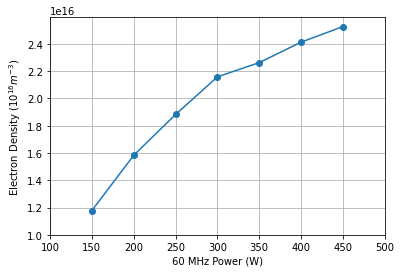

In [77]:
P_list = np.arange(150,500,50)
plt.plot(P_list,n_0,marker='o')
plt.xlabel('60 MHz Power (W)')
plt.ylabel('Electron Density ($10^{16}m^{-3}$)')
plt.grid(1)
plt.xlim(100,500)
plt.ylim(1e16)

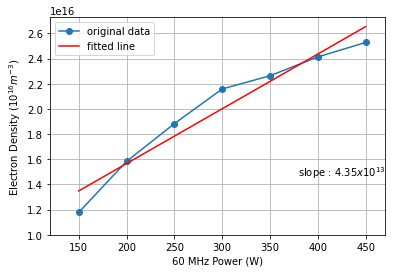

4.350e+13


In [121]:
slope, intercept, r_value, p_value, std_err = stats.linregress(P_list,n_0)
plt.plot(P_list, n_0, marker='o', label='original data')
plt.plot(P_list, intercept + slope*P_list, 'r', label='fitted line')
plt.xlabel('60 MHz Power (W)')
plt.ylabel('Electron Density ($10^{16}m^{-3}$)')
plt.grid(1)
plt.xlim(120,470)
plt.ylim(1e16)
plt.figtext(.7, .33, "slope : $4.35x10^{13}$")
plt.legend()
plt.show()
print(format(slope,'.3e'))

In [100]:
print(format((n_0[-1]-n_0[0])/300,'.4e'))

4.4993e+13


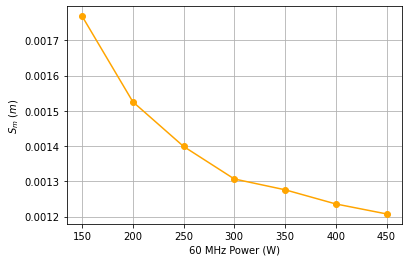

In [84]:
P_list = np.arange(150,500,50)
plt.plot(P_list,s_m,color='orange',marker='o')
plt.xlabel('60 MHz Power (W)')
plt.ylabel('$S_m$ ($m$)')
plt.grid(1)


(0.0, 200.0)

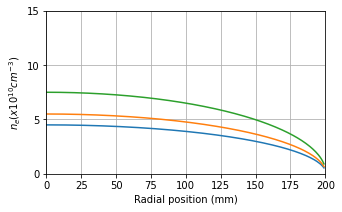

In [172]:
def n_e(r,n_e0):
    n = n_e0*(1-(1-h_R**2)*r**2/R**2)**0.5
    return n

R_range = np.arange(0,R,1e-3)
plt.figure(figsize=(5,3))
plt.plot(R_range*1000,n_e(R_range,4.5),R_range*1000,n_e(R_range,5.5),R_range*1000,n_e(R_range,7.5))
plt.grid(1,which='both')
plt.ylim(0,15)
plt.yticks([0,5,10,15])
plt.xlabel('Radial position (mm)')
plt.ylabel('$n_e (x10^{10} cm^{-3})$')
plt.xlim(0,200)
